# 脸部特征

脸部特征由68个基本点组成

<img src="facial_landmarks_68markup-1024x825.jpg" alt="Drawing" style="width: 400px;"/>

In [1]:
import sys
import numpy as np
import math 
from imutils import face_utils
from collections import OrderedDict
import cv2
import argparse
import imutils
import dlib

sys.path.append('..')
from opencv_course import ImageUtil

In [2]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def distance_p2line(p, l1, l2):
    return np.linalg.norm(np.cross(l2-l1, l1-p))/np.linalg.norm(l2-l1)

def distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0) 

def midpoint(p1, p2):
    return ((int)((p1[0]+p2[0])/2), (int)((p1[1]+p2[1])/2))

#判断是否左脸比右脸大
def left_bigger(shape):
    left_edge = shape[2]
    left_nose = shape[31]
    right_edge = shape[14]
    right_nose = shape[35]
    return distance(left_edge, left_nose) > distance(right_edge, right_nose)

In [3]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

In [4]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
shape_predictor = '../../detector/shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

In [6]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread('two.png')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

In [7]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    i=1
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 255, 0), -1)
        i+=1
    if left_bigger(shape):
        cv2.circle(image, midpoint(shape[21],shape[48]), 1, (0, 255, 0), -1)
    else:
        cv2.circle(image, midpoint(shape[22],shape[54]), 1, (0, 255, 0), -1)
    

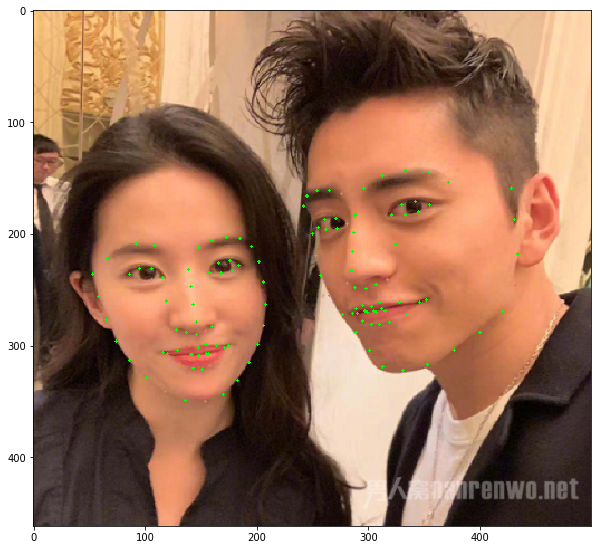

In [8]:
ImageUtil.imshow([image])